<a href="https://colab.research.google.com/github/jhsribeiro/agente-analise-financeira-rag/blob/main/Agente_Financeiro_com_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U langchain langchain-core langchain-google-genai

  Using cached langchain_google_genai-3.0.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached google_ai_generativelanguage-0.9.0-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.4.0
    Uninstalling google-ai-generativelanguage-0.4.0:
      Successfully uninstalled google-ai-generativelanguage-0.4.0
  Attempting uninstall: langchain-google-genai
    Found existing installation: langchain-google-genai 0.0.1
    Uninstalling langchain-google-genai-0.0.1:
      Successfully uninstalled langchain-google-genai-0.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GoogleAPIkey = userdata.get('GOOGLE_API_KEY')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

folder_path = '/content/drive/MyDrive/PETROBRAS_2T2025'

drive_folder = Path(folder_path)

if not drive_folder.exists():
    print(f"ERRO: A pasta '{folder_path}' não foi encontrada.")
    print("Verifique se o caminho está correto e se a pasta existe no seu Google Drive.")
else:
    pdf_files = list(drive_folder.glob("*.pdf"))

    if not pdf_files:
        print(f"Nenhum arquivo PDF encontrado na pasta: {folder_path}")
        print("Por favor, verifique se os arquivos .pdf estão na pasta correta.")
    else:
        for n in pdf_files:
            try:
                loader = PyMuPDFLoader(str(n))
                docs.extend(loader.load())
                print(f"Carregado com sucesso o arquivo: {n.name}")
            except Exception as e:
                print(f"Erro ao carregar o arquivo {n.name}: {e}")

        print(f"\nTotal de páginas/documentos carregados: {len(docs)}")

Carregado com sucesso o arquivo: Desempenho Financeiro Petrobras 2T25.pdf

Total de páginas/documentos carregados: 42


In [ ]:
# Um chunk_size maior pode ajudar a manter o contexto de tabelas e seções financeiras
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=150)
chunks = splitter.split_documents(docs)

In [ ]:
print(f"Total de trechos (chunks) criados: {len(chunks)}")

Total de trechos (chunks) criados: 81


In [ ]:
for chunk in chunks:
  print(chunk)
  print("---------------------------")

page_content='Relatório de
Desempenho
2T25 
— 
 
  
 
FPSO Alexandre de Gusmão 
1º óleo em maio de 2025' metadata={'producer': 'Microsoft® Word para Microsoft 365', 'creator': 'Microsoft® Word para Microsoft 365', 'creationdate': '2025-08-07T17:54:37-03:00', 'source': '/content/drive/MyDrive/PETROBRAS_2T2025/Desempenho Financeiro Petrobras 2T25.pdf', 'file_path': '/content/drive/MyDrive/PETROBRAS_2T2025/Desempenho Financeiro Petrobras 2T25.pdf', 'total_pages': 42, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2025-08-07T22:13:59-03:00', 'trapped': '', 'modDate': "D:20250807221359-03'00'", 'creationDate': "D:20250807175437-03'00'", 'page': 0}
---------------------------
page_content='Relatório de Desempenho 2T25    I  2 
 
AVISOS 
 
 
 
 
 
 
Sumário 
Destaques – 2T25 
4 
Principais itens e indicadores 
6 
Resultado consolidado 
7 
Eventos exclusivos 
8 
Investimentos 
9 
Liquidez e recursos de capital 
12 
Indicadores de endividamento 
14 
R

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GoogleAPIkey
)

In [ ]:
import time
from langchain_community.vectorstores import FAISS
from tqdm.auto import tqdm # Biblioteca para adicionar uma barra de progresso visual

In [ ]:
# Criação do Vector Store com FAISS e Embeddings do Gemini

import time
from langchain_community.vectorstores import FAISS
from tqdm.auto import tqdm
# A exceção correta que a Langchain lança
from langchain_google_genai.embeddings import GoogleGenerativeAIError

# criação em lotes
batch_size = 20
vectorstore = None

print(f"Total de chunks a serem processados: {len(chunks)}")
print(f"Processando em lotes de {batch_size} chunks...")

# tqdm para visualizar o progresso.
for i in tqdm(range(0, len(chunks), batch_size)):
    batch = chunks[i:i + batch_size]

    while True:
        try:
            if vectorstore is None:
                vectorstore = FAISS.from_documents(batch, embeddings)
            else:
                vectorstore.add_documents(batch)

            # Se deu certo, saia do loop de retentativa
            break

        # exceção
        except GoogleGenerativeAIError as e:
            # Verificamos se o erro é realmente de cota (429)
            if "429" in str(e):
                print(f"\nAVISO: Limite de cota atingido. Aguardando 61 segundos para reiniciar...")
                time.sleep(61)
                print("Tentando processar o mesmo lote novamente...")
            else:
                # Se for outro erro, pare a execução
                raise e

print("\n--- Vector Store criado com sucesso! ---")

retriever = vectorstore.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"score_threshold": 0.4, "k": 5}
)

print("Retriever criado com sucesso!")

Total de chunks a serem processados: 81
Processando em lotes de 20 chunks...


  0%|          | 0/5 [00:00<?, ?it/s]


AVISO: Limite de cota atingido. Aguardando 61 segundos para reiniciar...
Tentando processar o mesmo lote novamente...

--- Vector Store criado com sucesso! ---
Retriever criado com sucesso!


In [ ]:
llm = ChatGoogleGenerativeAI (
    model="gemini-2.5-flash",
    temperature=0.2,
    api_key=GoogleAPIkey
)

In [ ]:
!pip install langchain-classic

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_classic.chains.combine_documents import create_stuff_documents_chain

SYSTEM_PROMPT = """
Você é um Agente de Inteligência Artificial especializado em análise financeira de estatais brasileiras.
Seu papel é:
- Responder perguntas objetivas sobre relatórios e demonstrações contábeis.
- Analisar documentos fornecidos em PDFs.
- Produzir sínteses trimestrais com os principais indicadores financeiros.
- Comparar resultados entre períodos ou entre empresas.

Fontes de Dados:
- Use **apenas** o contexto dos documentos oficiais fornecidos.
- Se a informação não estiver disponível no contexto, responda **exatamente**: "Não consta no documento fornecido."
- Sempre que citar um dado, indique o período de referência.
- Se a pergunta for ambígua, peça mais contexto.

Estrutura preferencial de respostas:
- **Tabela** -> para valores e comparativos.
- **Bullet points** -> para destaques e insights.
- **Resumo executivo** -> quando o usuário pedir síntese ou relatório.
"""

prompt_rag = ChatPromptTemplate.from_messages([
    ("system", SYSTEM_PROMPT),
    ("human", "Pergunta do Usuário: {input}\n\nContexto dos Documentos:\n{context}")
])

document_chain = create_stuff_documents_chain(llm, prompt_rag)
print("Chain de RAG configurada corretamente.")

Chain de RAG configurada corretamente.


In [ ]:
# Formatação
import re
import pathlib
from typing import List, Dict

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 300) -> str:
    txt = _clean_text(texto)
    pos = txt.lower().find(query.lower()[:50])
    if pos == -1: pos = 0
    ini = max(0, pos - janela//2)
    fim = min(len(txt), pos + janela//2)
    return f"...{txt[ini:fim]}..."

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen_docs = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source", "")).name
        if src not in seen_docs:
            page = int(d.metadata.get("page", 0)) + 1
            cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
            seen_docs.add(src)
    return cites[:3]

def analisar_documento_RAG(pergunta: str) -> Dict:
    if not retriever:
        return {"answer": "Nenhum documento foi carregado para análise.", "citacoes": [], "contexto_encontrado": False}

    docs_relacionados = retriever.invoke(pergunta)
    if not docs_relacionados:
        return {"answer": "Não consta no documento fornecido.", "citacoes": [], "contexto_encontrado": False}

    response = document_chain.invoke({"input": pergunta, "context": docs_relacionados})
    txt = (response or "").strip()

    if txt == "Não consta no documento fornecido.":
        return {"answer": txt, "citacoes": [], "contexto_encontrado": False}

    return {"answer": txt, "citacoes": formatar_citacoes(docs_relacionados, pergunta), "contexto_encontrado": True}

In [ ]:
!pip install -q --upgrade langgraph

In [ ]:
# Construção do agente com Langgraph

from typing_extensions import TypedDict, Optional

class AgentState(TypedDict, total=False):
  pergunta: str
  resposta: Optional[str]
  citacoes: List[dict]
  contexto_encontrado: bool
  acao_final: str

In [ ]:
def node_analise_financeira(state: AgentState) -> AgentState:
  print(">>> Executando Nó de Análise Financeira...")
  resultadoRAG = analisar_documento_RAG(state["pergunta"])
  return {
    "pergunta": state["pergunta"],
    "resposta": resultadoRAG["answer"],
    "citacoes": resultadoRAG.get("citacoes", []),
    "contexto_encontrado": resultadoRAG["contexto_encontrado"]
  }

In [ ]:
def node_pedir_contexto(state: AgentState) -> AgentState:
    print(">>> Executando Nó de Pedir Contexto...")
    return {
        "resposta": "Sua pergunta parece ambígua. Por favor, forneça mais contexto ou detalhes específicos.",
        "citacoes": [],
        "acao_final": "PEDIR_CONTEXTO"
    }

In [ ]:
def node_info_nao_encontrada(state: AgentState) -> AgentState:
    print(">>> Executando Nó de Informação Não Encontrada...")
    return {
        "resposta": "Não consta no documento fornecido.",
        "citacoes": [],
        "acao_final": "INFO_NAO_ENCONTRADA"
    }

In [ ]:
KEYWORDS_AMBIGUAS = ["fale sobre", "resuma", "visão geral", "como está"]

In [ ]:
def decidir_fluxo_pos_analise(state: AgentState) -> str:
    print(">>> Borda: Decidindo próximo passo...")
    if state.get("contexto_encontrado"):
        state["acao_final"] = "ANALISE_CONCLUIDA"
        return "fim"
    if any(keyword in state["pergunta"].lower() for keyword in KEYWORDS_AMBIGUAS):
        return "pedir_contexto"
    return "info_nao_encontrada"

In [ ]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)
workflow.add_node("analise_financeira", node_analise_financeira)
workflow.add_node("pedir_contexto", node_pedir_contexto)
workflow.add_node("info_nao_encontrada", node_info_nao_encontrada)
workflow.set_entry_point("analise_financeira")
workflow.add_conditional_edges(
    "analise_financeira",
    decidir_fluxo_pos_analise,
    {"pedir_contexto": "pedir_contexto", "info_nao_encontrada": "info_nao_encontrada", "fim": END}
)
workflow.add_edge("pedir_contexto", END)
workflow.add_edge("info_nao_encontrada", END)
agente_financeiro = workflow.compile()
print("Agente com LangGraph compilado e pronto.")

Agente com LangGraph compilado e pronto.



--- Visualização do Fluxo do Agente ---


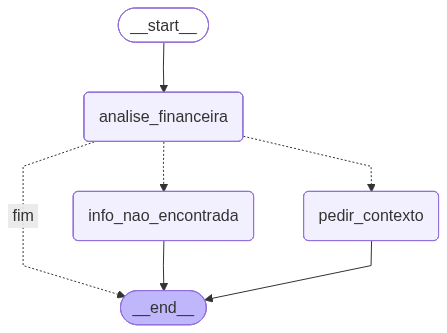

In [ ]:
# Visualização do Langgraph
from IPython.display import Image, display

try:
    graph_bytes = agente_financeiro.get_graph().draw_mermaid_png()
    print("\n--- Visualização do Fluxo do Agente ---")
    display(Image(graph_bytes))
except Exception as e:
    print(f"\nNão foi possível gerar a imagem do grafo: {e}")

In [ ]:
testes = [
    "Qual foi o lucro líquido no último trimestre reportado?",
    "Compare as despesas operacionais entre este trimestre e o mesmo trimestre do ano anterior.",
    "Qual o valor do caixa disponível no final do período?",
    "Fale sobre a governança da empresa.",
    "Qual foi o placar do último jogo do Flamengo?"
]

print("\n\n--- INICIANDO TESTES DO AGENTE ---")

for i, msg_teste in enumerate(testes):
    print(f"\n--- TESTE {i+1} ---")
    if not retriever:
        print("Nenhum documento carregado. Teste pulado.")
        continue

    resposta_final = agente_financeiro.invoke({"pergunta": msg_teste})

    print(f"\nPERGUNTA: {msg_teste}")
    print(f"RESPOSTA FINAL:\n{resposta_final.get('resposta')}")

    if resposta_final.get("citacoes"):
        print("\nCITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

print("\n--- TODOS OS TESTES FORAM CONCLUÍDOS ---")



--- INICIANDO TESTES DO AGENTE ---

--- TESTE 1 ---
>>> Executando Nó de Análise Financeira...
>>> Borda: Decidindo próximo passo...

PERGUNTA: Qual foi o lucro líquido no último trimestre reportado?
RESPOSTA FINAL:
O lucro líquido no último trimestre reportado (2T25) foi de **R$ 26.774 milhões**.

**Detalhes:**

| Indicador                     | 2T25 (R$ milhões) |
| :---------------------------- | :---------------- |
| Lucro (prejuízo) líquido do período | 26.774            |

CITAÇÕES:
 - Documento: Desempenho Financeiro Petrobras 2T25.pdf, Página: 20
   Trecho: ...Relatório de Desempenho 2T25 I 20 ANEXOS Anexos Demonstrações financeiras Tabela 11 - Demonstração do resultado – Consolidado R$ milhões 2T25 1T25 2T2...

--- TESTE 2 ---
>>> Executando Nó de Análise Financeira...
>>> Borda: Decidindo próximo passo...

PERGUNTA: Compare as despesas operacionais entre este trimestre e o mesmo trimestre do ano anterior.
RESPOSTA FINAL:
As despesas operacionais entre o 2T25 e o 2T24 são as

In [ ]:
# Interface interativa com o chat

print("\n\n--- INICIANDO CHAT INTERATIVO COM O AGENTE ---")
print("O agente está pronto. Faça sua pergunta.")
print("Para terminar a conversa, digite 'sair', 'fim' ou 'exit'.")

# Loop infinito para manter a conversa
while True:
    pergunta = input("\nVocê: ")

    # Verifica se o usuário quer sair
    if pergunta.lower().strip() in ["sair", "fim", "exit"]:
        print("\nAgente: Encerrando a sessão. Até a próxima!")
        break

    # Garante que temos documentos carregados antes de continuar
    if not retriever:
        print("\nAgente: Desculpe, nenhum documento foi carregado. Não posso responder perguntas.")
        continue

    # Invoca o agente com a pergunta do usuário
    # Bloco try/except para o caso de ocorrer um erro inesperado na API
    try:
        resposta_final = agente_financeiro.invoke({"pergunta": pergunta})

        # Resposta principal do agente
        print(f"\nAgente: {resposta_final.get('resposta')}")

        # Se houver citações, print também
        if resposta_final.get("citacoes"):
            print("\nFontes encontradas:")
            for citacao in resposta_final.get("citacoes"):
                print(f"  - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
                print(f"    Trecho: {citacao['trecho']}")

    except Exception as e:
        print(f"\nAgente: Ocorreu um erro inesperado ao processar sua pergunta: {e}")

    print("\n" + "="*70) # Adiciona uma linha para separar as conversas